## Load Data and Initial Grid Search

In [ ]:
DATA_NAME = 'batch0approx1e5-agriVision-wavelet-red' # size-name-transform-channel

In [ ]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
RERUN = True
CWD

'c:\\Users\\yashd\\Desktop\\hierarchical-bayesian-model-validation\\results\\case-studies\\agriVision\\wavelet\\batch0approx1e5\\red'

In [12]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [13]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))

GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)
cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::100] for g in GROUPS} # For quick testing purposes
group_total_samples

{2: 9000,
 3: 36000,
 4: 144000,
 5: 576000,
 6: 2304000,
 7: 9216000,
 8: 36864000,
 9: 147456000,
 10: 589824000}

In [14]:
''' Only need to run commented code once'''
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
all_cdfs_df.head()

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:818: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:823: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:823: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:823: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2


(r,eta),cdf     r  eta  \
0  ((0.02, -1.4), <scipy.interpolate._fitpack2.In...  0.02 -1.4   
1  ((0.02, -1.3), <scipy.interpolate._fitpack2.In...  0.02 -1.3   
2  ((0.02, -1.2), <scipy.interpolate._fitpack2.In...  0.02 -1.2   
3  ((0.02, -1.1), <scipy.interpolate._fitpack2.In...  0.02 -1.1   
4  ((0.02, -1.0), <scipy.interpolate._fitpack2.In...  0.02 -1.0   

                                                 cdf      variance  \
0  <scipy.interpolate._fitpack2.InterpolatedUniva...  9.618487e+69   
1  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.821735e+74   
2  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.455488e+78   
3  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.406735e+81   
4  <scipy.interpolate._fitpack2.InterpolatedUniva...  5.331443e+83   

       kurtosis  
0  1.391529e+25  
1  8.172634e+21  
2  4.131785e+19  
3  6.947275e+17  
4  2.562075e+16

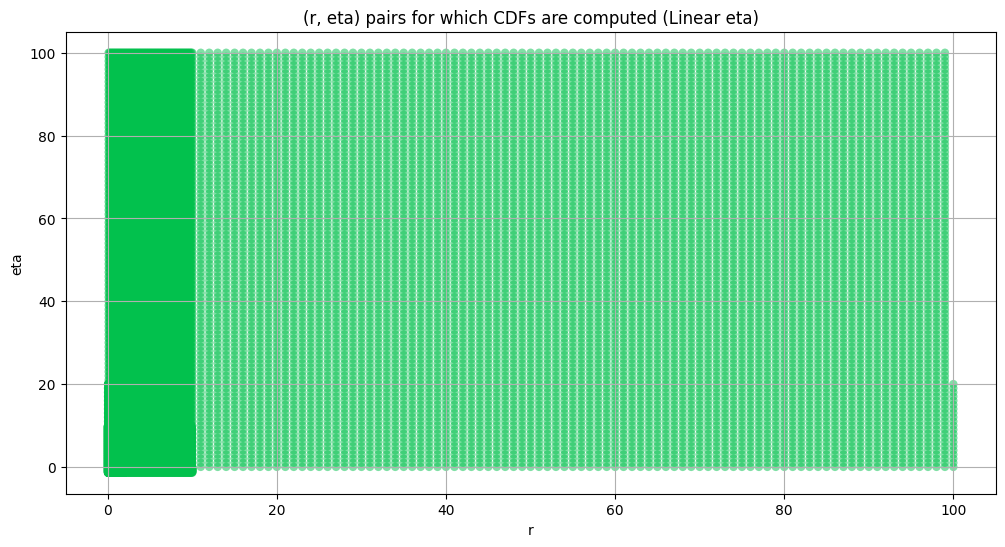

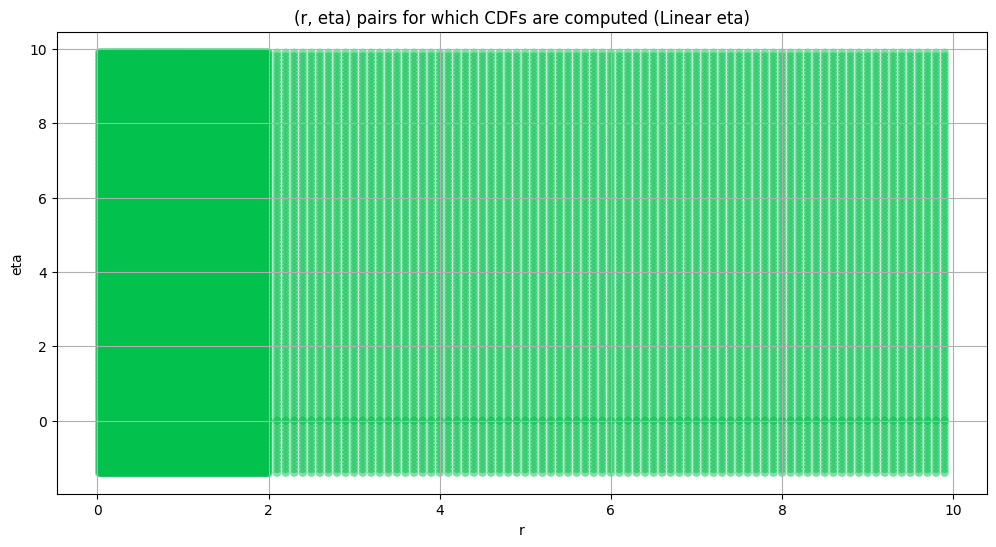

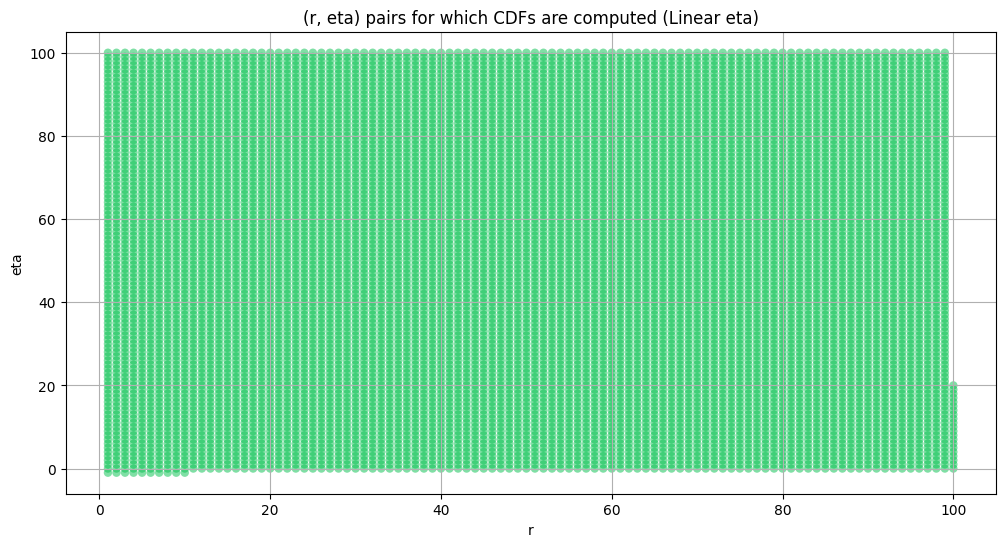

c:\Users\yashd\.conda\envs\hbmv_backup2\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\yashd\.conda\envs\hbmv_backup2\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


r           eta       variance      kurtosis
count  51883.000000  51883.000000   5.188300e+04  5.064200e+04
mean      11.990701     21.476312            inf           inf
std       22.639851     28.237512            inf           NaN
min        0.020000     -1.400000   0.000000e+00  4.787254e-04
25%        1.000000      3.000000   9.882555e-01  1.513901e-02
50%        1.970000      7.600000   1.482803e+00  1.950077e-01
75%        8.100000     32.000000   5.742021e+00  6.565170e-01
max      100.000000    100.000000  1.797693e+308           inf

In [15]:
create_scatter_plot(all_cdfs_df)
create_scatter_plot(all_cdfs_df[(all_cdfs_df['r'] < 10) & (all_cdfs_df['eta'] < 10)])
create_scatter_plot(coarse_cdf_df)

all_cdfs_df.describe()

In [16]:
n_bootstrap = int(1e5)
bootstrap_size = int(1e4)
ci = 0.99

In [17]:
var_kurt_df_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if RERUN or not var_kurt_df_path.exists():
    for group in  GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(var_kurt_df_path, index_col=GROUP)
var_kurt_df = pd.read_csv(var_kurt_df_path, index_col=GROUP)
master_df

Layer 2


100%|██████████| 100000/100000 [03:09<00:00, 527.29it/s]


Layer 3


100%|██████████| 100000/100000 [03:05<00:00, 537.89it/s]


Layer 4


100%|██████████| 100000/100000 [02:50<00:00, 585.53it/s]


Layer 5


100%|██████████| 100000/100000 [02:40<00:00, 623.93it/s]


Layer 6


100%|██████████| 100000/100000 [02:33<00:00, 651.31it/s]


Layer 7


100%|██████████| 100000/100000 [02:35<00:00, 641.41it/s]


Layer 8


100%|██████████| 100000/100000 [02:40<00:00, 621.27it/s]


Layer 9


100%|██████████| 100000/100000 [02:39<00:00, 627.82it/s]


Layer 10


100%|██████████| 100000/100000 [02:41<00:00, 619.35it/s]


obs_var      var_lower      var_upper      obs_kurt  kurt_lower  \
layer                                                                          
2      179850.663319  104860.602584  313803.097773    501.382031   36.681158   
3       48278.004584   29689.330646   75753.017422    352.490549   90.264791   
4       13505.898405    6427.192129   29259.093413   1066.342755  112.379992   
5        3324.956135    1098.146111   15512.152578   6607.175158   86.604650   
6         902.737484     217.958739    6909.072731  18939.147805   76.743279   
7         249.888787      58.955746    1795.422641  19071.879951   51.215465   
8          57.432179      22.249527     277.407471   8527.045747   61.023674   
9          14.412282       5.902646      62.396598   6442.510618   77.116605   
10          2.162876       0.811485       9.683872   7078.996216   80.460814   

        kurt_upper  total_samples  
layer                              
2       756.942381         9000.0  
3       561.888369        36000.0  
4      2700.459218       144000.0  
5      7123.889070       576000.0  
6      8727.643776      2304000.0  
7      8606.341394      9216000.0  
8      6916.660564     36864000.0  
9      6425.334046    147456000.0  
10     6695.153257    589824000.0

####
Layer  2


100%|██████████| 51883/51883 [01:18<00:00, 663.77it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 9000, Without approximation : 9000.0


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


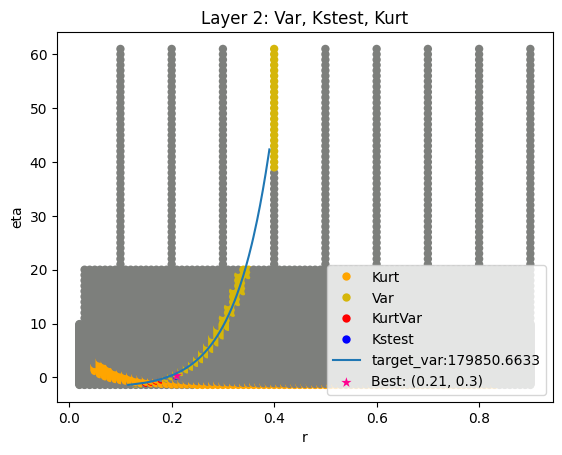

####
Layer  3


100%|██████████| 51883/51883 [03:44<00:00, 230.62it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 36000, Without approximation : 36000.0


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


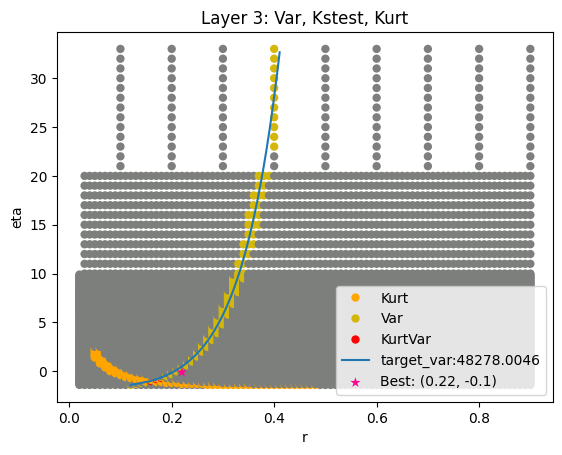

####
Layer  4


100%|██████████| 51883/51883 [10:14<00:00, 84.46it/s] 


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 144000.0


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


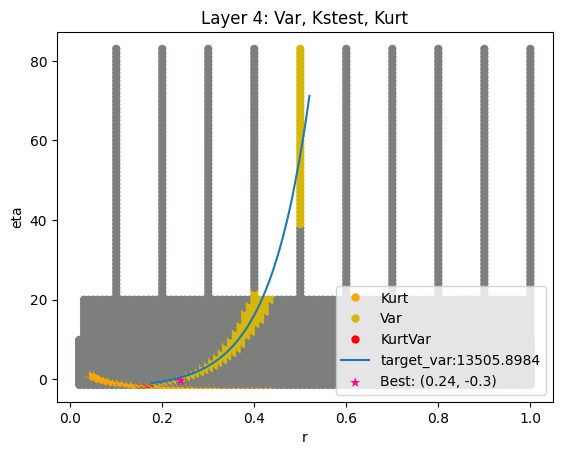

####
Layer  5


100%|██████████| 51883/51883 [10:15<00:00, 84.26it/s] 


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 576000.0


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


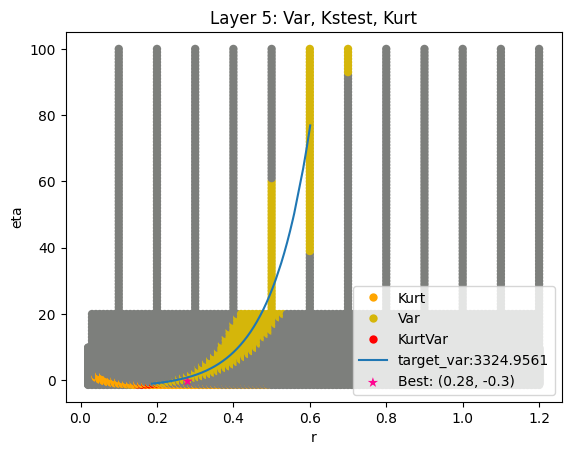

####
Layer  6


100%|██████████| 51883/51883 [10:09<00:00, 85.13it/s] 


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 2304000.0


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


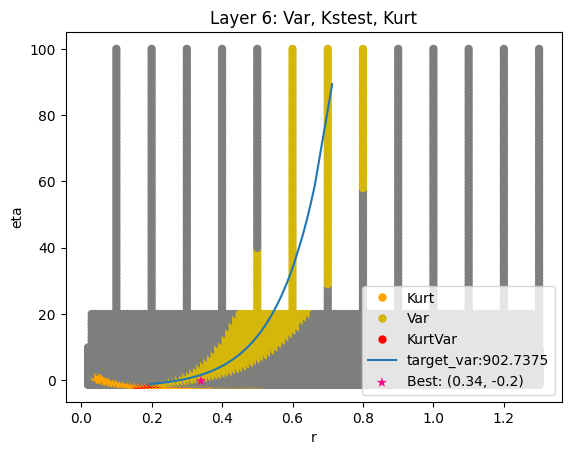

####
Layer  7


100%|██████████| 51883/51883 [09:50<00:00, 87.80it/s] 


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 9216000.0


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


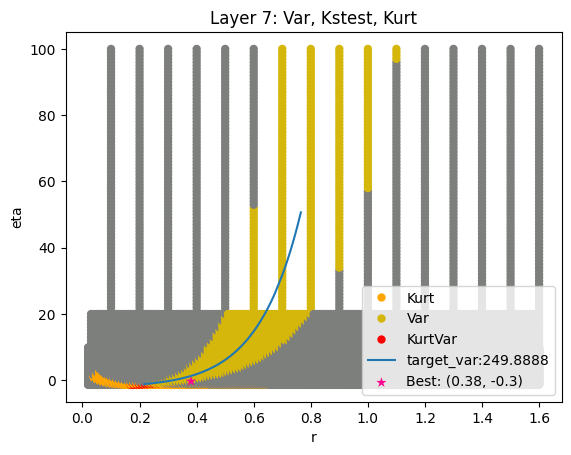

####
Layer  8


100%|██████████| 51883/51883 [10:17<00:00, 83.99it/s] 


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 36864000.0


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


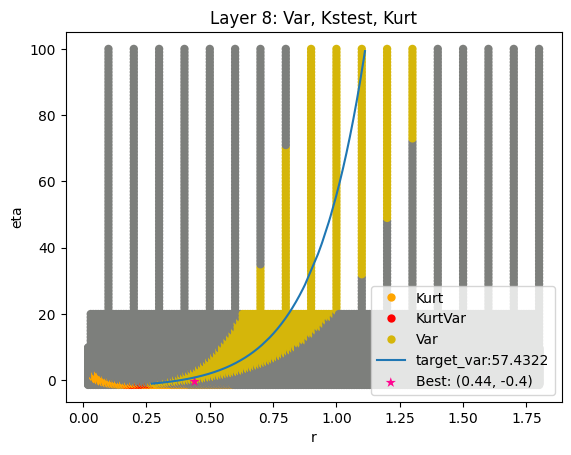

####
Layer  9


100%|██████████| 51883/51883 [10:09<00:00, 85.16it/s] 


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 147456000.0


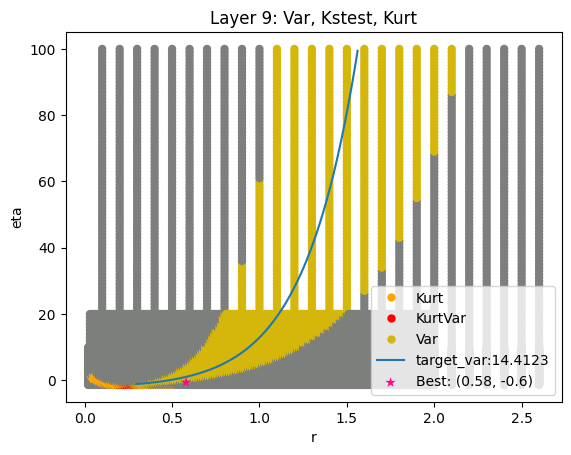

####
Layer  10


100%|██████████| 51883/51883 [09:49<00:00, 88.00it/s] 


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 589824000.0


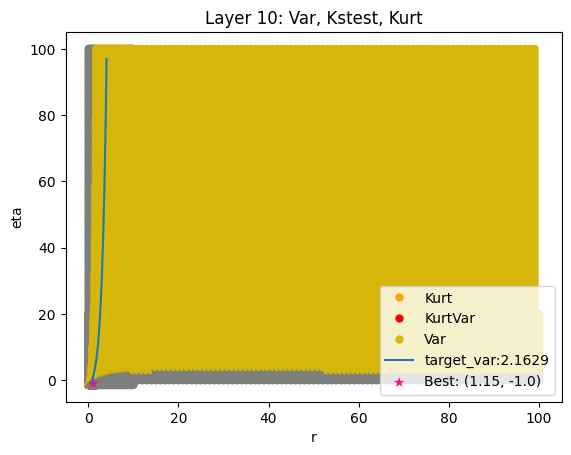

obs_var      var_lower      var_upper      obs_kurt  kurt_lower  \
layer                                                                          
2      179850.663319  104860.602584  313803.097773    501.382031   36.681158   
3       48278.004584   29689.330646   75753.017422    352.490549   90.264791   
4       13505.898405    6427.192129   29259.093413   1066.342755  112.379992   
5        3324.956135    1098.146111   15512.152578   6607.175158   86.604650   
6         902.737484     217.958739    6909.072731  18939.147805   76.743279   
7         249.888787      58.955746    1795.422641  19071.879951   51.215465   
8          57.432179      22.249527     277.407471   8527.045747   61.023674   
9          14.412282       5.902646      62.396598   6442.510618   77.116605   
10          2.162876       0.811485       9.683872   7078.996216   80.460814   

        kurt_upper  total_samples  initial_r  initial_eta  \
layer                                                       
2       756.942381         9000.0       0.21          0.3   
3       561.888369        36000.0       0.22         -0.1   
4      2700.459218       144000.0       0.24         -0.3   
5      7123.889070       576000.0       0.28         -0.3   
6      8727.643776      2304000.0       0.34         -0.2   
7      8606.341394      9216000.0       0.38         -0.3   
8      6916.660564     36864000.0       0.44         -0.4   
9      6425.334046    147456000.0       0.58         -0.6   
10     6695.153257    589824000.0       1.15         -1.0   

       kstest_stat_initial  kstest_stat_cutoff_0.05  
layer                                                
2                 0.013056                 0.014297  
3                 0.012202                 0.007153  
4                 0.009140                 0.003578  
5                 0.007905                 0.001789  
6                 0.007537                 0.000895  
7                 0.004525                 0.000447  
8                 0.005698                 0.000224  
9                 0.007569                 0.000112  
10                0.026810                 0.000056

In [18]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
group_cdf_df_dict_path = Path(os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

if RERUN or not master_df_combo_path.exists() or not group_cdf_df_dict_path.exists():
    sorted_params = sorted(all_cdfs)
    group_cdf_df_dict = dict()

    for i, group in enumerate(GROUPS):
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        group_cdf_df = all_cdfs_df.copy()
        ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
        master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        master_df.loc[group, 'kstest_stat_initial'] = min_stat
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
        
        group_cdf_df_dict[group] = group_cdf_df
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = master_df.loc[group, 'obs_var'],
                            best_param = initial_param)
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

        # Optional: Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
    pd.to_pickle(group_cdf_df_dict, os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

group_cdf_df_dict = pd.read_pickle(group_cdf_df_dict_path)
master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
master_df

In [19]:
master_df_eta0_path = Path(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))
if not master_df_eta0_path.exists():
    best_params_eta0 = []
    for i, group in enumerate(GROUPS):
        if master_df.loc[group, 'initial_eta'] != 0:
            sample = group_data_map[group]
            group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
            cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
            ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True)
            best_params_eta0.append(best_param_eta0[0])
            master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
        else:
            master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
            best_params_eta0.append(master_df.loc[group, 'initial_r'])
    master_df['best_r_eta0'] = best_params_eta0
    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(master_df_eta0_path, index_col=GROUP)
master_df

100%|██████████| 369/369 [00:00<00:00, 562.73it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 238.82it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:05<00:00, 70.69it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:05<00:00, 72.13it/s] 


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:03<00:00, 99.16it/s] 


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:05<00:00, 72.37it/s] 


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:05<00:00, 73.21it/s] 


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:03<00:00, 99.39it/s] 


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:05<00:00, 72.61it/s]

Finding Minimum after computing 369 CDFs


obs_var      var_lower      var_upper      obs_kurt  kurt_lower  \
layer                                                                          
2      179850.663319  104860.602584  313803.097773    501.382031   36.681158   
3       48278.004584   29689.330646   75753.017422    352.490549   90.264791   
4       13505.898405    6427.192129   29259.093413   1066.342755  112.379992   
5        3324.956135    1098.146111   15512.152578   6607.175158   86.604650   
6         902.737484     217.958739    6909.072731  18939.147805   76.743279   
7         249.888787      58.955746    1795.422641  19071.879951   51.215465   
8          57.432179      22.249527     277.407471   8527.045747   61.023674   
9          14.412282       5.902646      62.396598   6442.510618   77.116605   
10          2.162876       0.811485       9.683872   7078.996216   80.460814   

        kurt_upper  total_samples  initial_r  initial_eta  \
layer                                                       
2       756.942381         9000.0       0.21          0.3   
3       561.888369        36000.0       0.22         -0.1   
4      2700.459218       144000.0       0.24         -0.3   
5      7123.889070       576000.0       0.28         -0.3   
6      8727.643776      2304000.0       0.34         -0.2   
7      8606.341394      9216000.0       0.38         -0.3   
8      6916.660564     36864000.0       0.44         -0.4   
9      6425.334046    147456000.0       0.58         -0.6   
10     6695.153257    589824000.0       1.15         -1.0   

       kstest_stat_initial  kstest_stat_cutoff_0.05  kstest_stat_eta0  \
layer                                                                   
2                 0.013056                 0.014297          0.021657   
3                 0.012202                 0.007153          0.026819   
4                 0.009140                 0.003578          0.016313   
5                 0.007905                 0.001789          0.015594   
6                 0.007537                 0.000895          0.009959   
7                 0.004525                 0.000447          0.010589   
8                 0.005698                 0.000224          0.014585   
9                 0.007569                 0.000112          0.022312   
10                0.026810                 0.000056          0.117877   

       best_r_eta0  
layer               
2             0.20  
3             0.23  
4             0.26  
5             0.31  
6             0.36  
7             0.42  
8             0.52  
9             0.86  
10            6.20

In [20]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

Layer 2
(0.202, 0.27), 50 of 441
(0.204, 0.35), 100 of 441
(0.207, 0.22), 150 of 441
(0.209, 0.3), 200 of 441
(0.211, 0.38), 250 of 441
(0.214, 0.25), 300 of 441
(0.216, 0.33), 350 of 441
(0.219, 0.2), 400 of 441


100%|██████████| 441/441 [00:01<00:00, 381.35it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 2 best parameters: ((0.206, 0.2), 0.011132974300663123)
(0.205, 0.198), 450 of 882
(0.2052, 0.208), 500 of 882
(0.2055, 0.195), 550 of 882
(0.2057, 0.203), 600 of 882
(0.206, 0.19), 650 of 882
(0.2062, 0.2), 700 of 882
(0.2064, 0.208), 750 of 882
(0.2067, 0.195), 800 of 882
(0.2069, 0.203), 850 of 882


100%|██████████| 876/876 [00:01<00:00, 540.00it/s]


Finding Minimum after computing 876 CDFs
Iter 2 layer 2 best parameters: ((0.2057, 0.19), 0.010596827410775056)


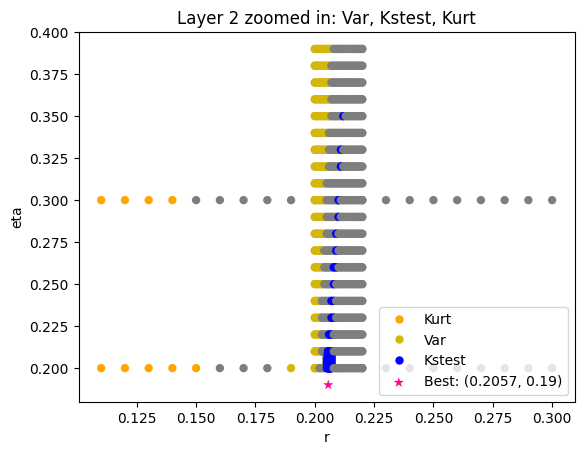

Layer 3
(0.212, -0.11), 50 of 420
(0.214, -0.01), 100 of 420
(0.217, -0.11), 150 of 420
(0.219, -0.01), 200 of 420
(0.222, -0.11), 250 of 420
(0.224, -0.01), 300 of 420
(0.227, -0.11), 350 of 420
(0.229, -0.01), 400 of 420


100%|██████████| 420/420 [00:02<00:00, 206.78it/s]


Finding Minimum after computing 420 CDFs
Iter 1 layer 3 best parameters: ((0.219, -0.1), 0.011121181437392047)
(0.2181, -0.099), 450 of 861
(0.2183, -0.091), 500 of 861
(0.2186, -0.104), 550 of 861
(0.2188, -0.096), 600 of 861
(0.2191, -0.106), 650 of 861
(0.2193, -0.098), 700 of 861
(0.2195, -0.09), 750 of 861
(0.2198, -0.103), 800 of 861
(0.22, -0.093), 850 of 861


100%|██████████| 852/852 [00:04<00:00, 211.97it/s]


Finding Minimum after computing 852 CDFs
Iter 2 layer 3 best parameters: ((0.2195, -0.094), 0.010630152617947752)


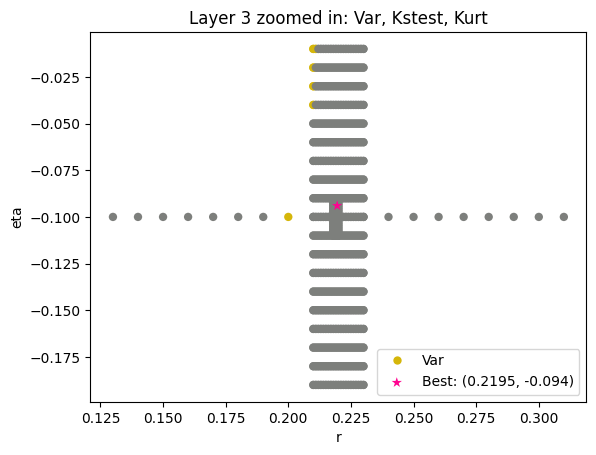

Layer 4
(0.232, -0.33), 50 of 441
(0.234, -0.25), 100 of 441
(0.237, -0.38), 150 of 441
(0.239, -0.3), 200 of 441
(0.241, -0.22), 250 of 441
(0.244, -0.35), 300 of 441
(0.246, -0.27), 350 of 441
(0.249, -0.4), 400 of 441


100%|██████████| 441/441 [00:05<00:00, 76.93it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 4 best parameters: ((0.239, -0.31), 0.008864049839707122)
(0.238, -0.311), 450 of 882
(0.2382, -0.301), 500 of 882
(0.2385, -0.314), 550 of 882
(0.2387, -0.306), 600 of 882
(0.239, -0.318), 650 of 882
(0.2392, -0.308), 700 of 882
(0.2394, -0.3), 750 of 882
(0.2397, -0.313), 800 of 882
(0.2399, -0.305), 850 of 882


100%|██████████| 873/873 [00:10<00:00, 83.39it/s] 


Finding Minimum after computing 873 CDFs
Iter 2 layer 4 best parameters: ((0.2388, -0.309), 0.00853309078565304)


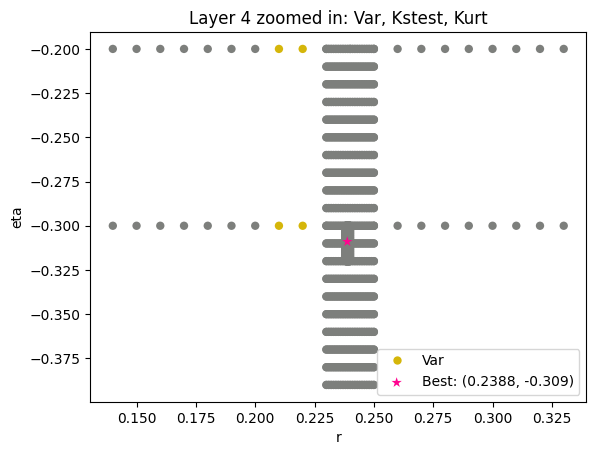

Layer 5
(0.272, -0.33), 50 of 441
(0.274, -0.25), 100 of 441
(0.277, -0.38), 150 of 441
(0.279, -0.3), 200 of 441
(0.281, -0.22), 250 of 441
(0.284, -0.35), 300 of 441
(0.286, -0.27), 350 of 441
(0.289, -0.4), 400 of 441


100%|██████████| 441/441 [00:05<00:00, 82.46it/s] 


Finding Minimum after computing 441 CDFs
Iter 1 layer 5 best parameters: ((0.278, -0.32), 0.007540773805641443)
(0.277, -0.321), 450 of 882
(0.2772, -0.311), 500 of 882
(0.2775, -0.324), 550 of 882
(0.2777, -0.316), 600 of 882
(0.278, -0.328), 650 of 882
(0.2782, -0.318), 700 of 882
(0.2784, -0.31), 750 of 882
(0.2787, -0.323), 800 of 882
(0.2789, -0.315), 850 of 882


100%|██████████| 873/873 [00:10<00:00, 84.79it/s] 


Finding Minimum after computing 873 CDFs
Iter 2 layer 5 best parameters: ((0.2773, -0.326), 0.007389538091831155)


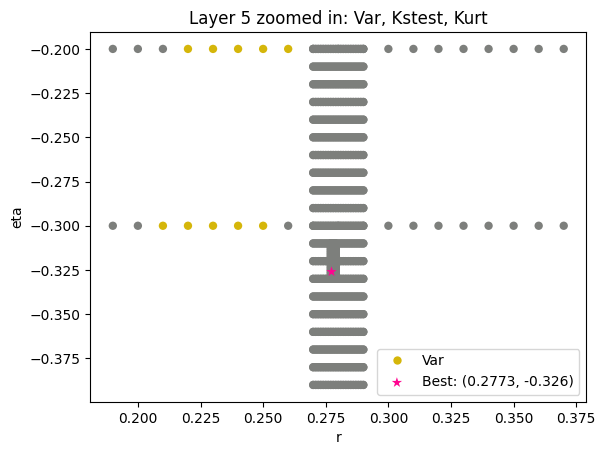

Layer 6
(0.332, -0.23), 50 of 441
(0.334, -0.15), 100 of 441
(0.337, -0.28), 150 of 441
(0.339, -0.2), 200 of 441
(0.341, -0.12), 250 of 441
(0.344, -0.25), 300 of 441
(0.346, -0.17), 350 of 441
(0.349, -0.3), 400 of 441


100%|██████████| 441/441 [00:05<00:00, 73.67it/s] 


Finding Minimum after computing 441 CDFs
Iter 1 layer 6 best parameters: ((0.33, -0.26), 0.005591745437246387)
(0.329, -0.262), 450 of 882
(0.3292, -0.254), 500 of 882
(0.3295, -0.267), 550 of 882
(0.3297, -0.259), 600 of 882
(0.3299, -0.251), 650 of 882
(0.3302, -0.261), 700 of 882
(0.3304, -0.253), 750 of 882
(0.3307, -0.266), 800 of 882
(0.3309, -0.258), 850 of 882


100%|██████████| 876/876 [00:10<00:00, 81.93it/s]


Finding Minimum after computing 876 CDFs
Iter 2 layer 6 best parameters: ((0.329, -0.265), 0.005415159963211513)


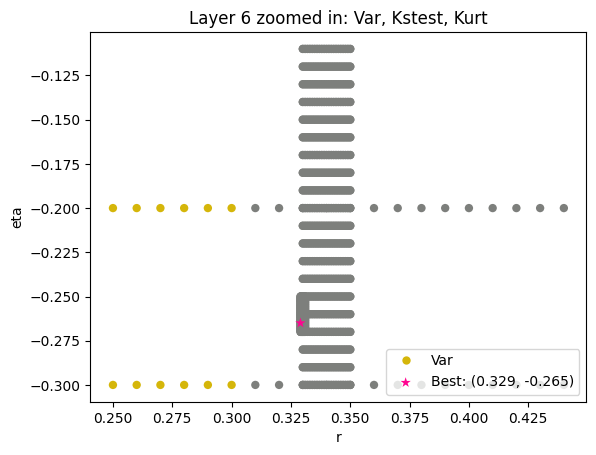

Layer 7
(0.372, -0.33), 50 of 441
(0.374, -0.25), 100 of 441
(0.377, -0.38), 150 of 441
(0.379, -0.3), 200 of 441
(0.381, -0.22), 250 of 441
(0.384, -0.35), 300 of 441
(0.386, -0.27), 350 of 441
(0.389, -0.4), 400 of 441


100%|██████████| 441/441 [00:05<00:00, 77.85it/s] 


Finding Minimum after computing 441 CDFs
Iter 1 layer 7 best parameters: ((0.379, -0.3), 0.004435680076549597)
(0.378, -0.301), 450 of 882
(0.3782, -0.291), 500 of 882
(0.3785, -0.304), 550 of 882
(0.3787, -0.296), 600 of 882
(0.379, -0.308), 650 of 882
(0.3792, -0.298), 700 of 882
(0.3794, -0.29), 750 of 882
(0.3797, -0.303), 800 of 882
(0.3799, -0.295), 850 of 882


100%|██████████| 873/873 [00:12<00:00, 70.78it/s] 


Finding Minimum after computing 873 CDFs
Iter 2 layer 7 best parameters: ((0.3784, -0.305), 0.004259620706075884)


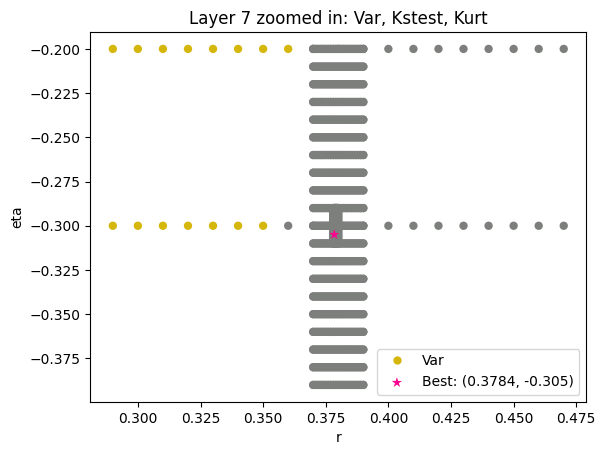

Layer 8
(0.432, -0.41), 50 of 420
(0.434, -0.31), 100 of 420
(0.437, -0.41), 150 of 420
(0.439, -0.31), 200 of 420
(0.442, -0.41), 250 of 420
(0.444, -0.31), 300 of 420
(0.447, -0.41), 350 of 420
(0.449, -0.31), 400 of 420


100%|██████████| 420/420 [00:05<00:00, 72.15it/s]


Finding Minimum after computing 420 CDFs
Iter 1 layer 8 best parameters: ((0.43, -0.43), 0.004198443588326106)
(0.4291, -0.432), 450 of 861
(0.4293, -0.424), 500 of 861
(0.4296, -0.437), 550 of 861
(0.4298, -0.429), 600 of 861
(0.4301, -0.439), 650 of 861
(0.4303, -0.431), 700 of 861
(0.4305, -0.423), 750 of 861
(0.4308, -0.436), 800 of 861
(0.431, -0.426), 850 of 861


100%|██████████| 855/855 [00:17<00:00, 49.95it/s]


Finding Minimum after computing 855 CDFs
Iter 2 layer 8 best parameters: ((0.429, -0.434), 0.004092167244442613)


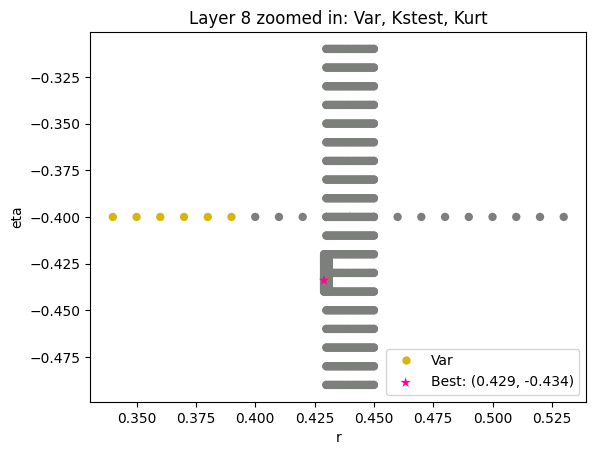

Layer 9
(0.572, -0.61), 50 of 420
(0.574, -0.51), 100 of 420
(0.577, -0.61), 150 of 420
(0.579, -0.51), 200 of 420
(0.582, -0.61), 250 of 420
(0.584, -0.51), 300 of 420
(0.587, -0.61), 350 of 420
(0.589, -0.51), 400 of 420


100%|██████████| 420/420 [00:06<00:00, 63.41it/s]


Finding Minimum after computing 420 CDFs
Iter 1 layer 9 best parameters: ((0.57, -0.61), 0.006643047340265683)
(0.5691, -0.612), 450 of 861
(0.5693, -0.604), 500 of 861
(0.5696, -0.617), 550 of 861
(0.5698, -0.609), 600 of 861
(0.5701, -0.619), 650 of 861
(0.5703, -0.611), 700 of 861
(0.5705, -0.603), 750 of 861
(0.5708, -0.616), 800 of 861
(0.571, -0.606), 850 of 861


100%|██████████| 855/855 [00:19<00:00, 43.47it/s]


Finding Minimum after computing 855 CDFs
Iter 2 layer 9 best parameters: ((0.569, -0.611), 0.00655179144257566)


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\plotting.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')


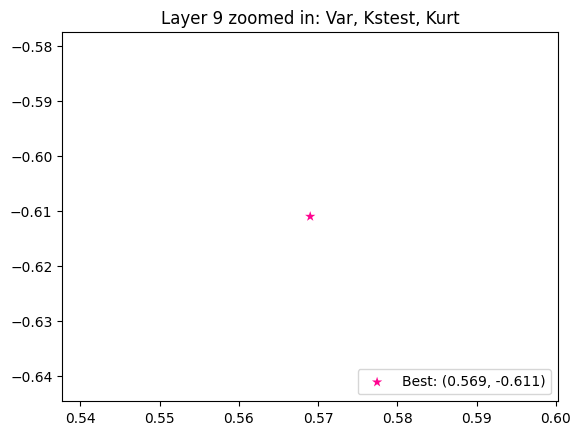

Layer 10
(1.142, -1.03), 50 of 441
(1.144, -0.95), 100 of 441
(1.147, -1.08), 150 of 441
(1.149, -1.0), 200 of 441
(1.151, -0.92), 250 of 441
(1.154, -1.05), 300 of 441
(1.156, -0.97), 350 of 441
(1.159, -1.1), 400 of 441


100%|██████████| 441/441 [00:18<00:00, 24.28it/s]


Finding Minimum after computing 441 CDFs
Iter 1 layer 10 best parameters: ((1.143, -1.01), 0.026809999999988177)
(1.142, -1.011), 450 of 861
(1.1422, -1.001), 500 of 861
(1.1425, -1.014), 550 of 861
(1.1427, -1.006), 600 of 861
(1.143, -1.018), 650 of 861
(1.1432, -1.008), 700 of 861
(1.1434, -1.0), 750 of 861
(1.1437, -1.013), 800 of 861
(1.1439, -1.005), 850 of 861


100%|██████████| 855/855 [00:13<00:00, 61.94it/s]


Finding Minimum after computing 855 CDFs
Iter 2 layer 10 best parameters: ((1.142, -1.013), 0.026809999999987844)


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\plotting.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')


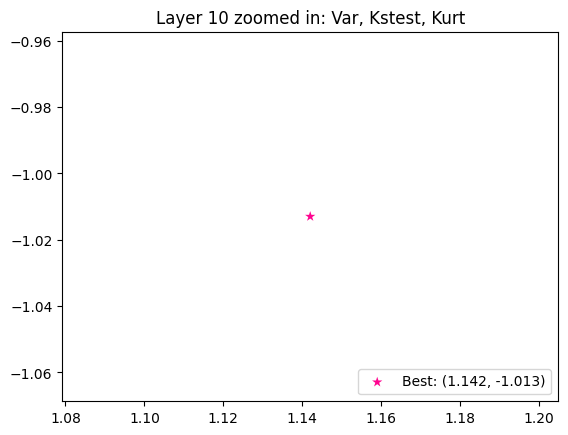

obs_var      var_lower      var_upper      obs_kurt  kurt_lower  \
layer                                                                          
2      179850.663319  104860.602584  313803.097773    501.382031   36.681158   
3       48278.004584   29689.330646   75753.017422    352.490549   90.264791   
4       13505.898405    6427.192129   29259.093413   1066.342755  112.379992   
5        3324.956135    1098.146111   15512.152578   6607.175158   86.604650   
6         902.737484     217.958739    6909.072731  18939.147805   76.743279   
7         249.888787      58.955746    1795.422641  19071.879951   51.215465   
8          57.432179      22.249527     277.407471   8527.045747   61.023674   
9          14.412282       5.902646      62.396598   6442.510618   77.116605   
10          2.162876       0.811485       9.683872   7078.996216   80.460814   

        kurt_upper  total_samples  initial_r  initial_eta  \
layer                                                       
2       756.942381         9000.0       0.21          0.3   
3       561.888369        36000.0       0.22         -0.1   
4      2700.459218       144000.0       0.24         -0.3   
5      7123.889070       576000.0       0.28         -0.3   
6      8727.643776      2304000.0       0.34         -0.2   
7      8606.341394      9216000.0       0.38         -0.3   
8      6916.660564     36864000.0       0.44         -0.4   
9      6425.334046    147456000.0       0.58         -0.6   
10     6695.153257    589824000.0       1.15         -1.0   

       kstest_stat_initial  ...  best_r  best_eta  kstest_stat_best  iter1_r  \
layer                       ...                                                
2                 0.013056  ...  0.2057     0.190          0.010597    0.206   
3                 0.012202  ...  0.2195    -0.094          0.010630    0.219   
4                 0.009140  ...  0.2388    -0.309          0.008533    0.239   
5                 0.007905  ...  0.2773    -0.326          0.007390    0.278   
6                 0.007537  ...  0.3290    -0.265          0.005415    0.330   
7                 0.004525  ...  0.3784    -0.305          0.004260    0.379   
8                 0.005698  ...  0.4290    -0.434          0.004092    0.430   
9                 0.007569  ...  0.5690    -0.611          0.006552    0.570   
10                0.026810  ...  1.1420    -1.013          0.026810    1.143   

       iter1_eta  kstest_stat_iter1  iter2_r  iter2_eta  kstest_stat_iter2  \
layer                                                                        
2           0.20           0.011133   0.2057      0.190           0.010597   
3          -0.10           0.011121   0.2195     -0.094           0.010630   
4          -0.31           0.008864   0.2388     -0.309           0.008533   
5          -0.32           0.007541   0.2773     -0.326           0.007390   
6          -0.26           0.005592   0.3290     -0.265           0.005415   
7          -0.30           0.004436   0.3784     -0.305           0.004260   
8          -0.43           0.004198   0.4290     -0.434           0.004092   
9          -0.61           0.006643   0.5690     -0.611           0.006552   
10         -1.01           0.026810   1.1420     -1.013           0.026810   

       n_pval_0.05  
layer               
2            17085  
3            17085  
4            25627  
5            34171  
6            60750  
7           102514  
8           108000  
9            43246  
10            2530  

[9 rows x 23 columns]

In [21]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

SKIP_OPTIMIZE_STEP = False
NUM_ITERS = dict(zip(GROUPS, [2]*len(GROUPS)))
NUM_SAMPLES_OPTIMIZE = 2000

if RERUN or not master_df_optimized_path.exists():
    if SKIP_OPTIMIZE_STEP:
        master_df['kstest_stat'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
    else:
        for group in GROUPS: 
            print(f"{GROUP.capitalize()} {group}")
            sample = group_data_map[group]
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            r_granularity = 10
            eta_granularity = 10
            for i in range(-1, -5, -1):
                if tuple([round_to_sigfigs(initial_r + 10.**i), initial_eta]) in all_cdfs:
                    r_granularity = 10.**i
                if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i)]) in all_cdfs:
                    
                    eta_granularity = 10.**i

            for d in range(1, NUM_ITERS[group] + 1):
                if d == 1:
                    initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
                else:
                    initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
                r_granularity = r_granularity * 10.0**(-d+1) 
                eta_granularity = eta_granularity * 10.0**(-d+1) 

                r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
                eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
                simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
                cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
                ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

                temp_df = create_kurt_var_ksstat_df(cdfs_dict)
                temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
                group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
                master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
                master_df.loc[group, 'kstest_stat_best'] = kstest_stat
                master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
                master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
                
                print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

            temp_df = group_cdf_df_dict[group]
            eps = 0.1
            filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                            (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                            (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                            (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(filtered_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', f'best_r', f'best_eta', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
master_df

## Comparing Empirical and Computed CDF/PDF

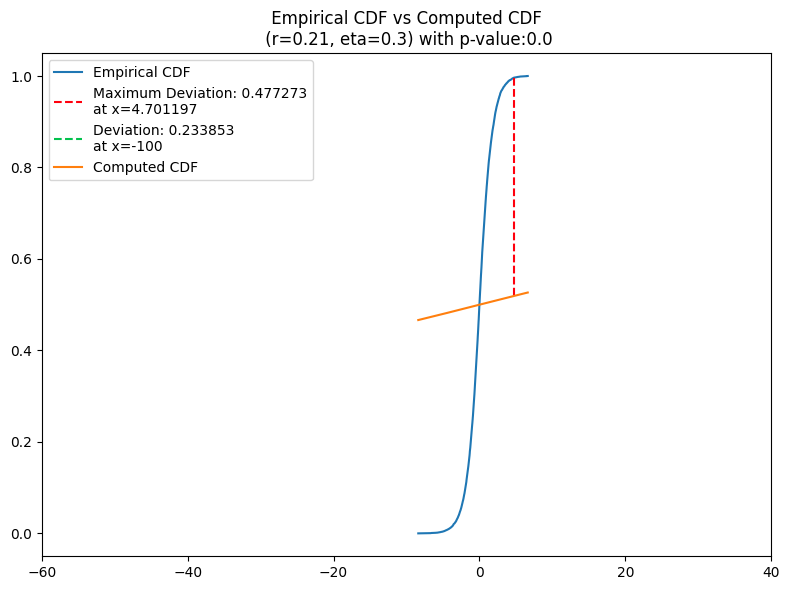

In [22]:
# Example Cell
group = 2
visualize_cdf(sample = sample_prior(1, 1, 10000), 
              all_cdfs = None, 
              params = (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']),
              distro = 'gengamma',
              n_samples=200, 
              interval = (-60, 40), 
              provided_loc = -100);

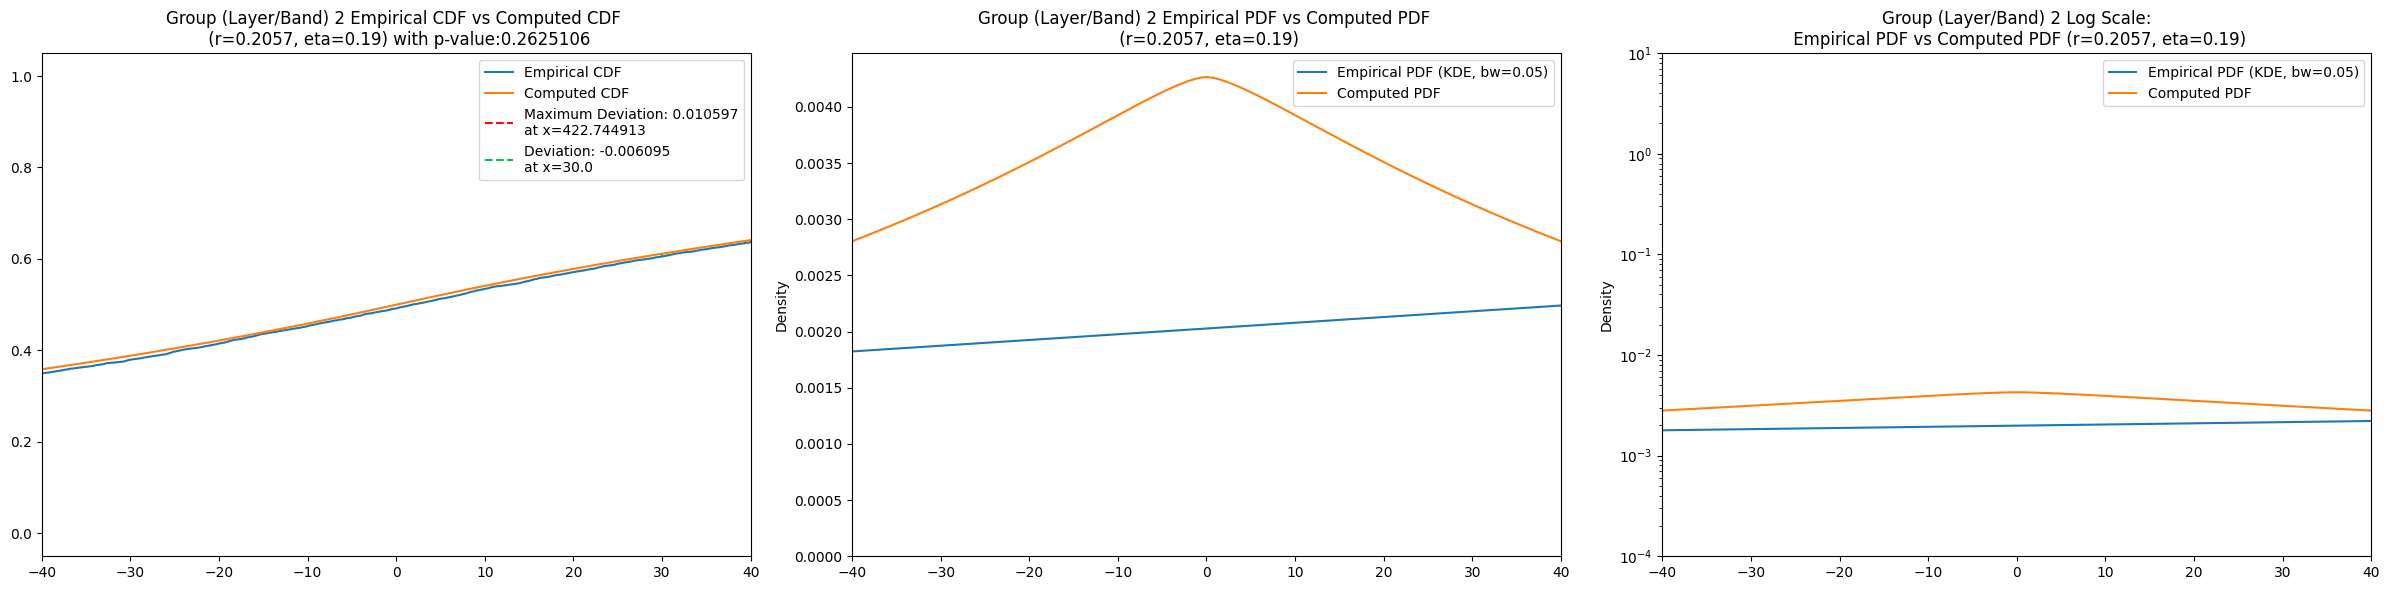

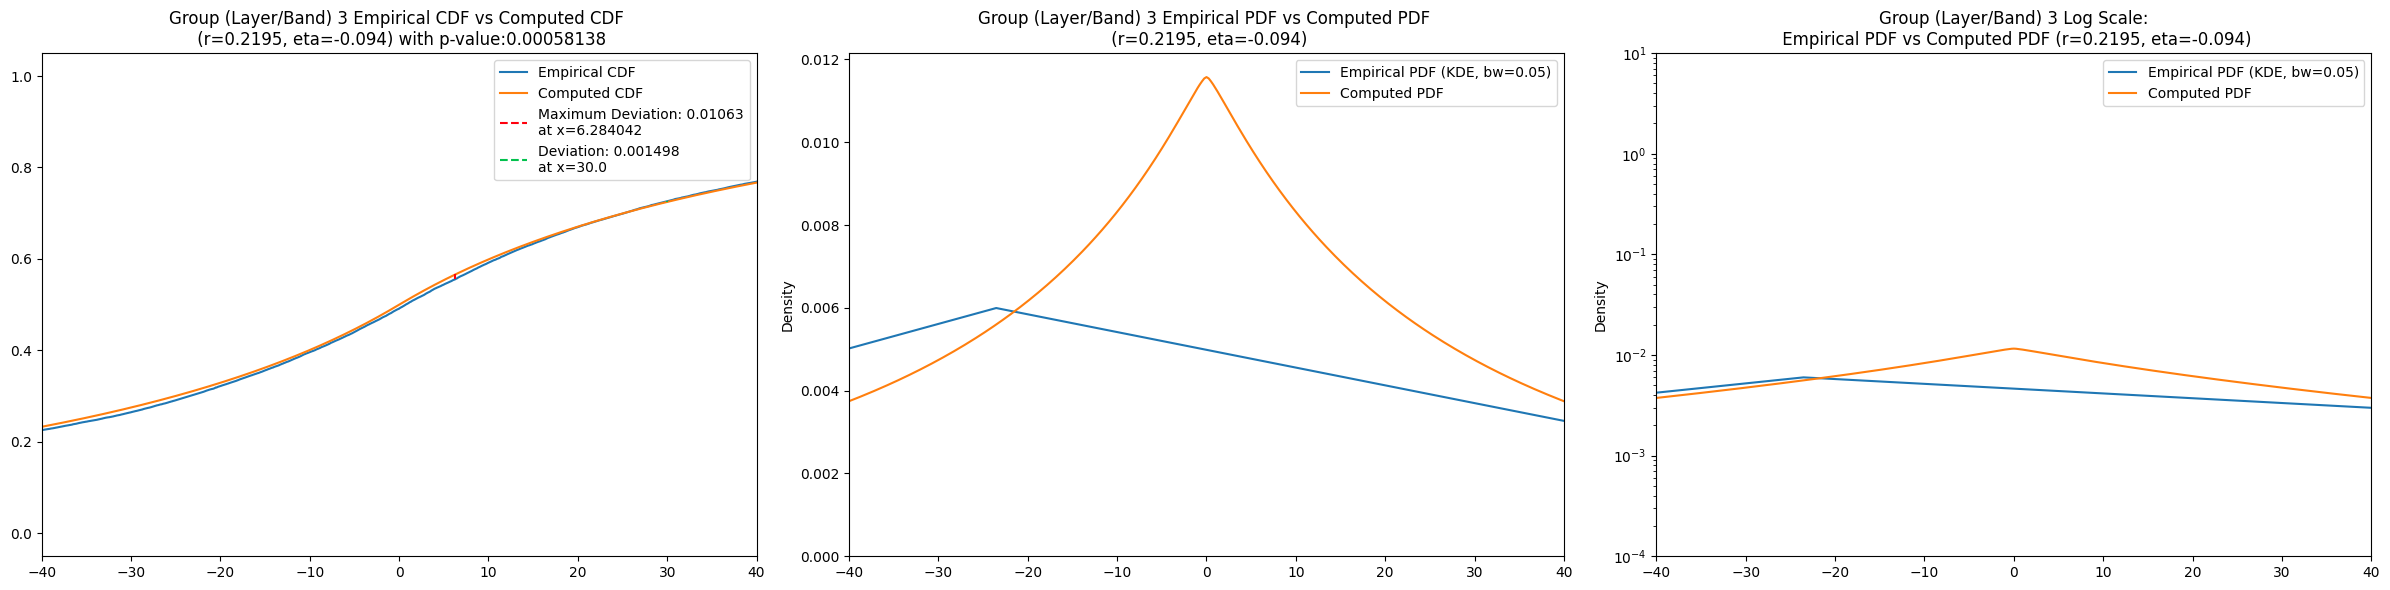

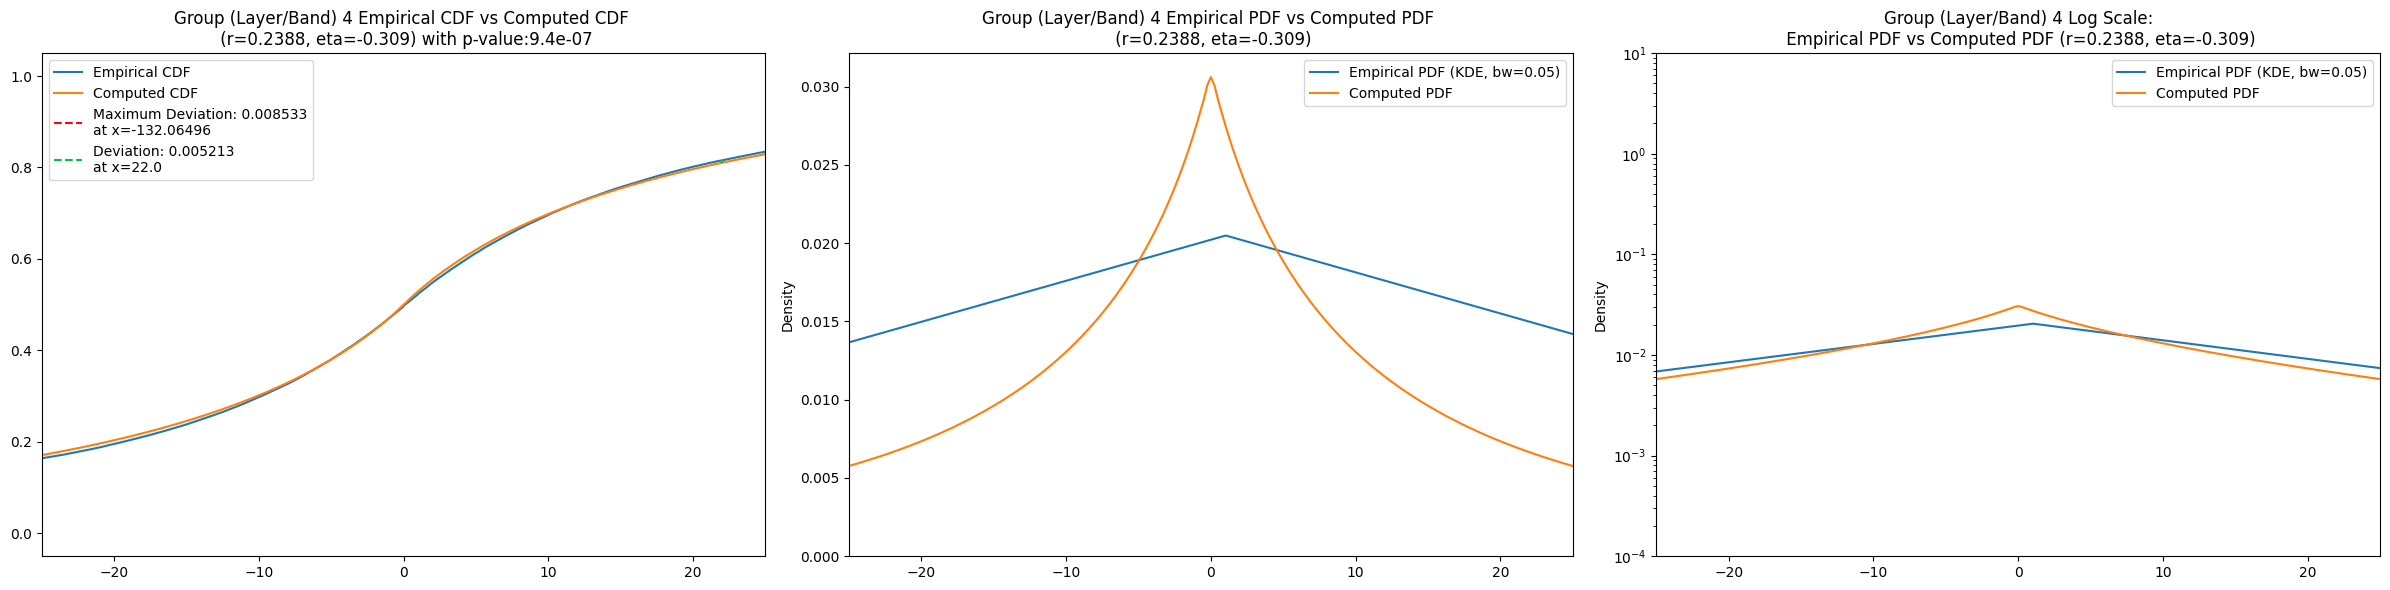

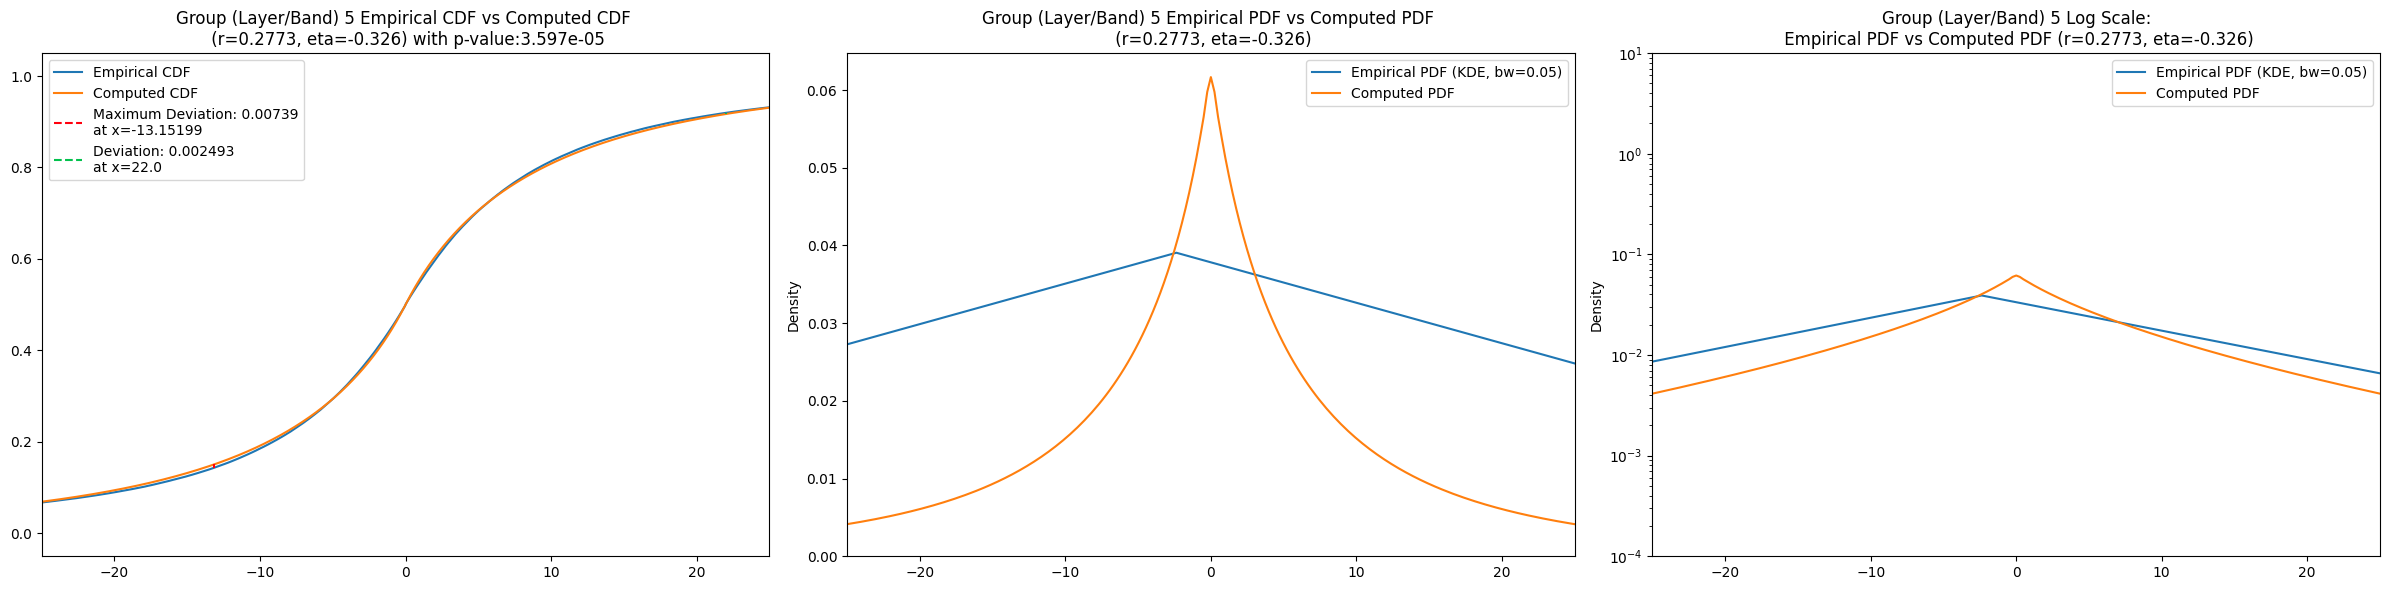

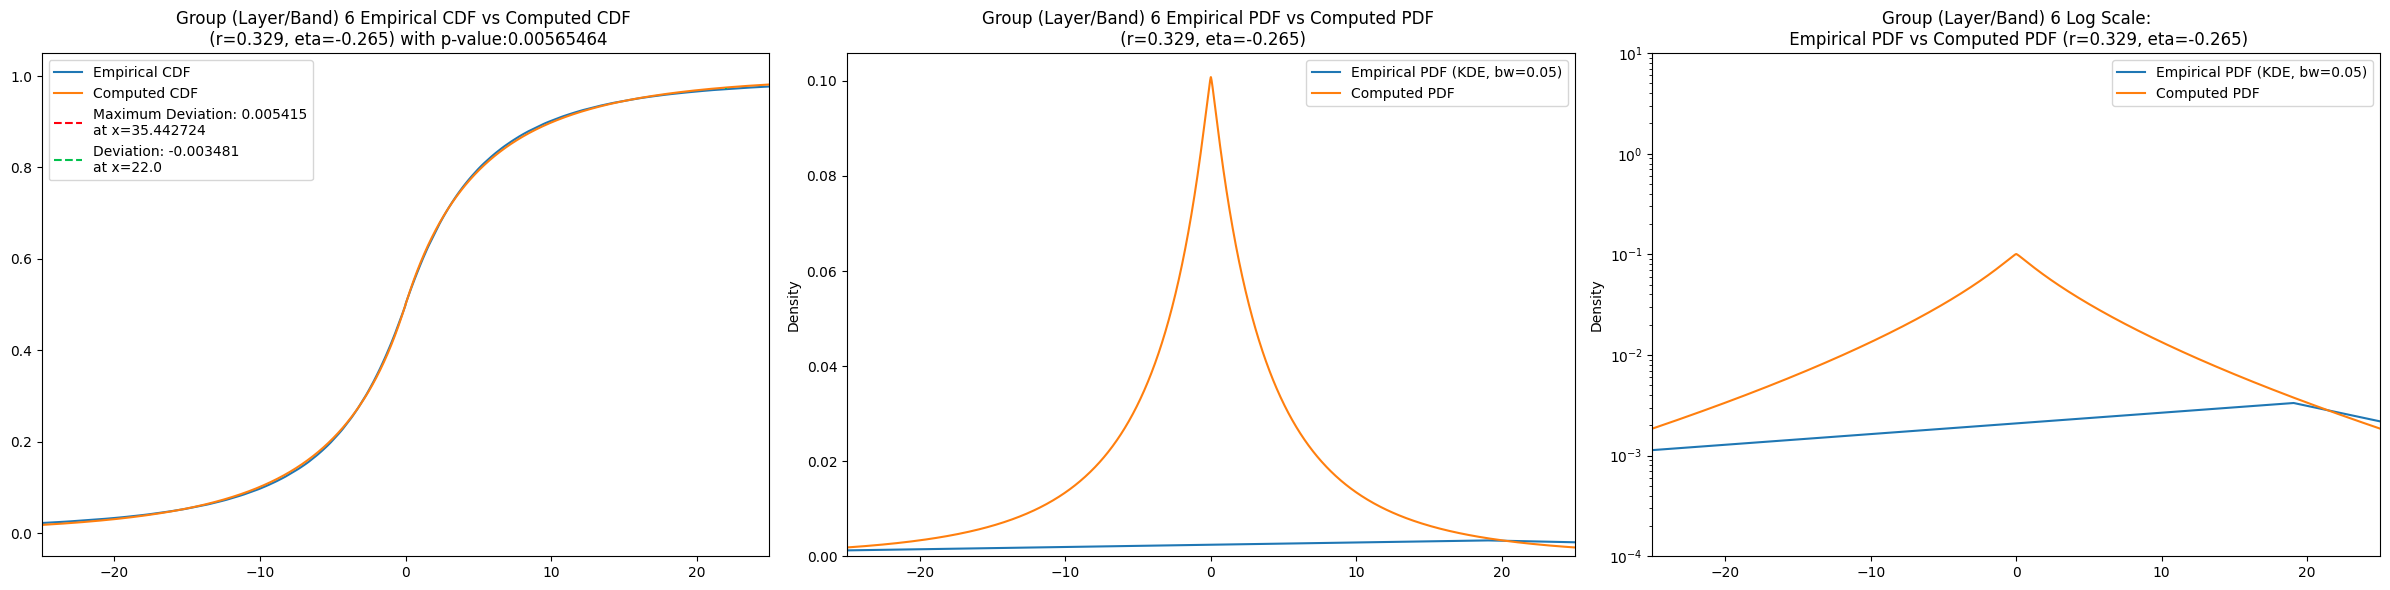

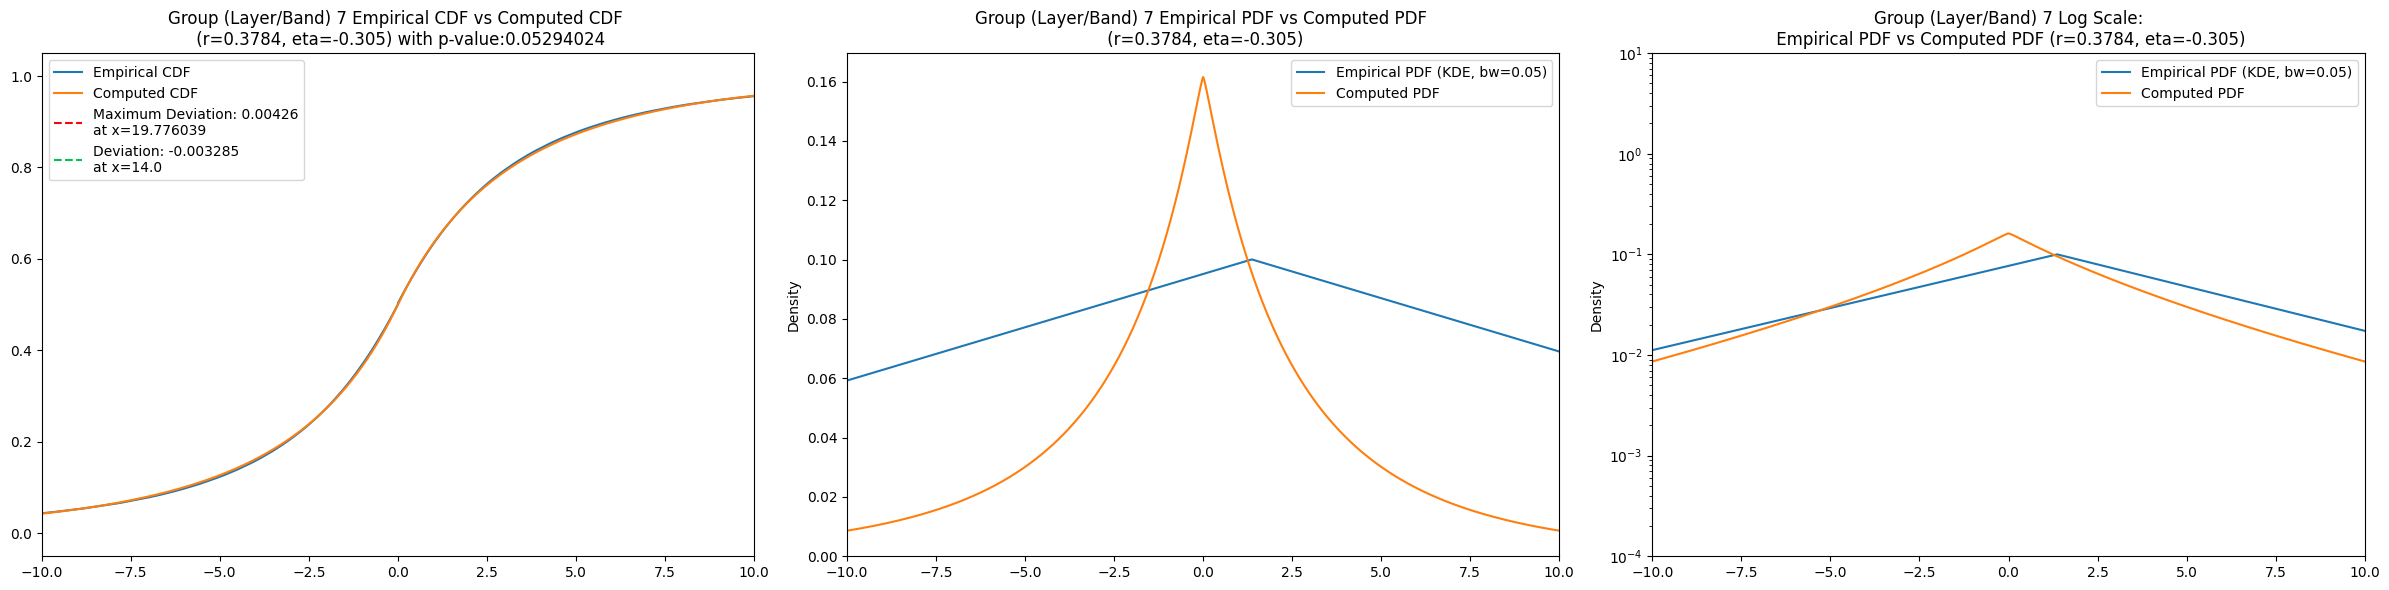

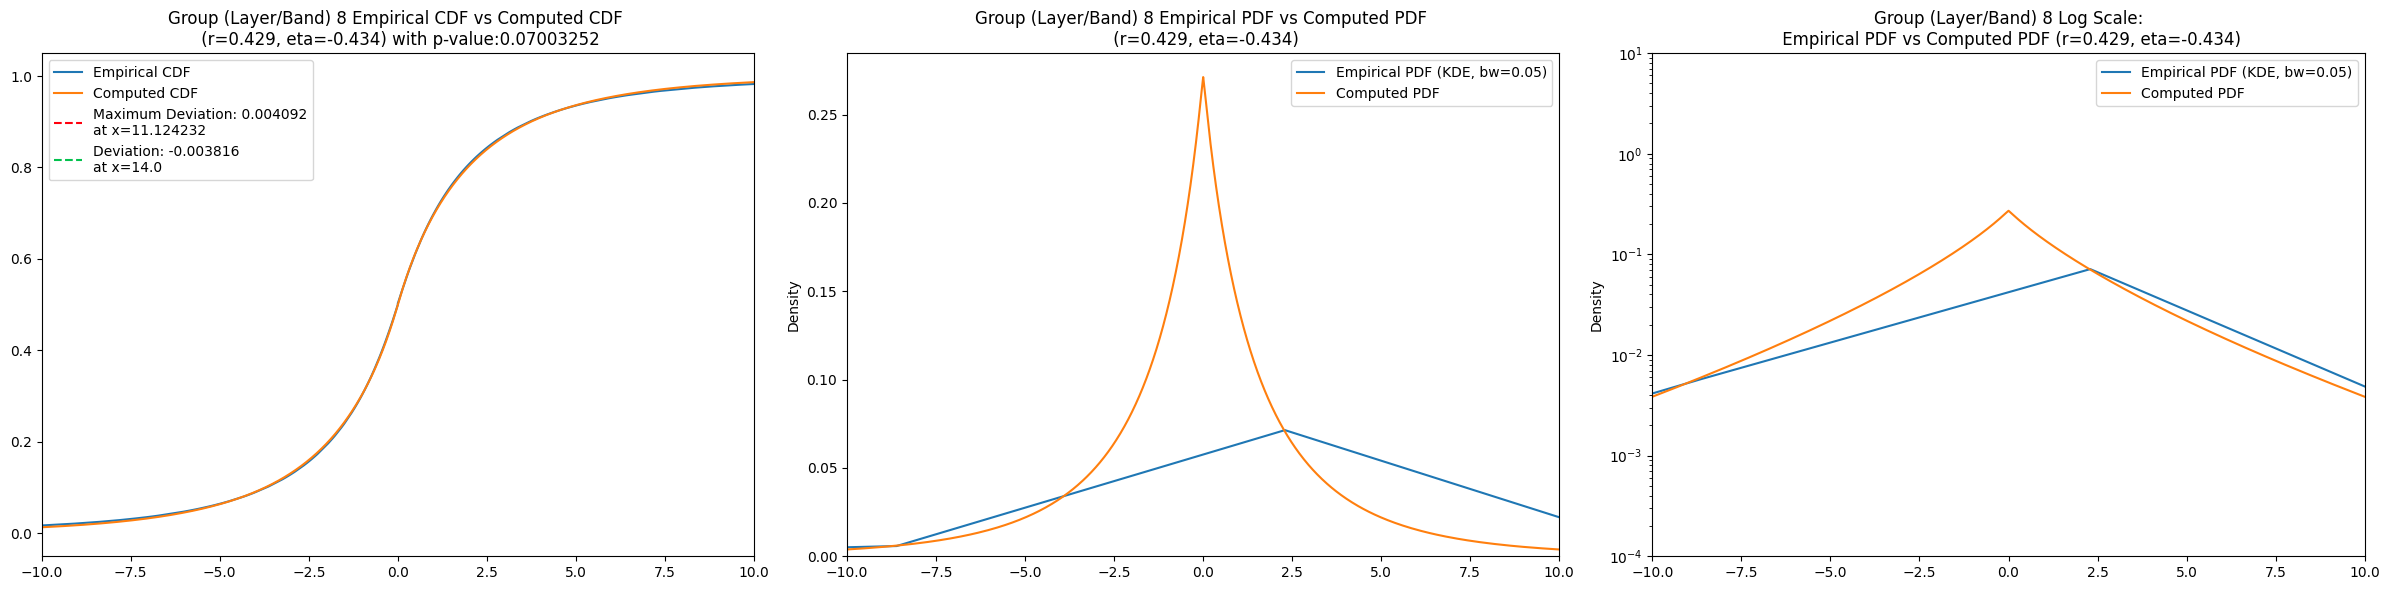

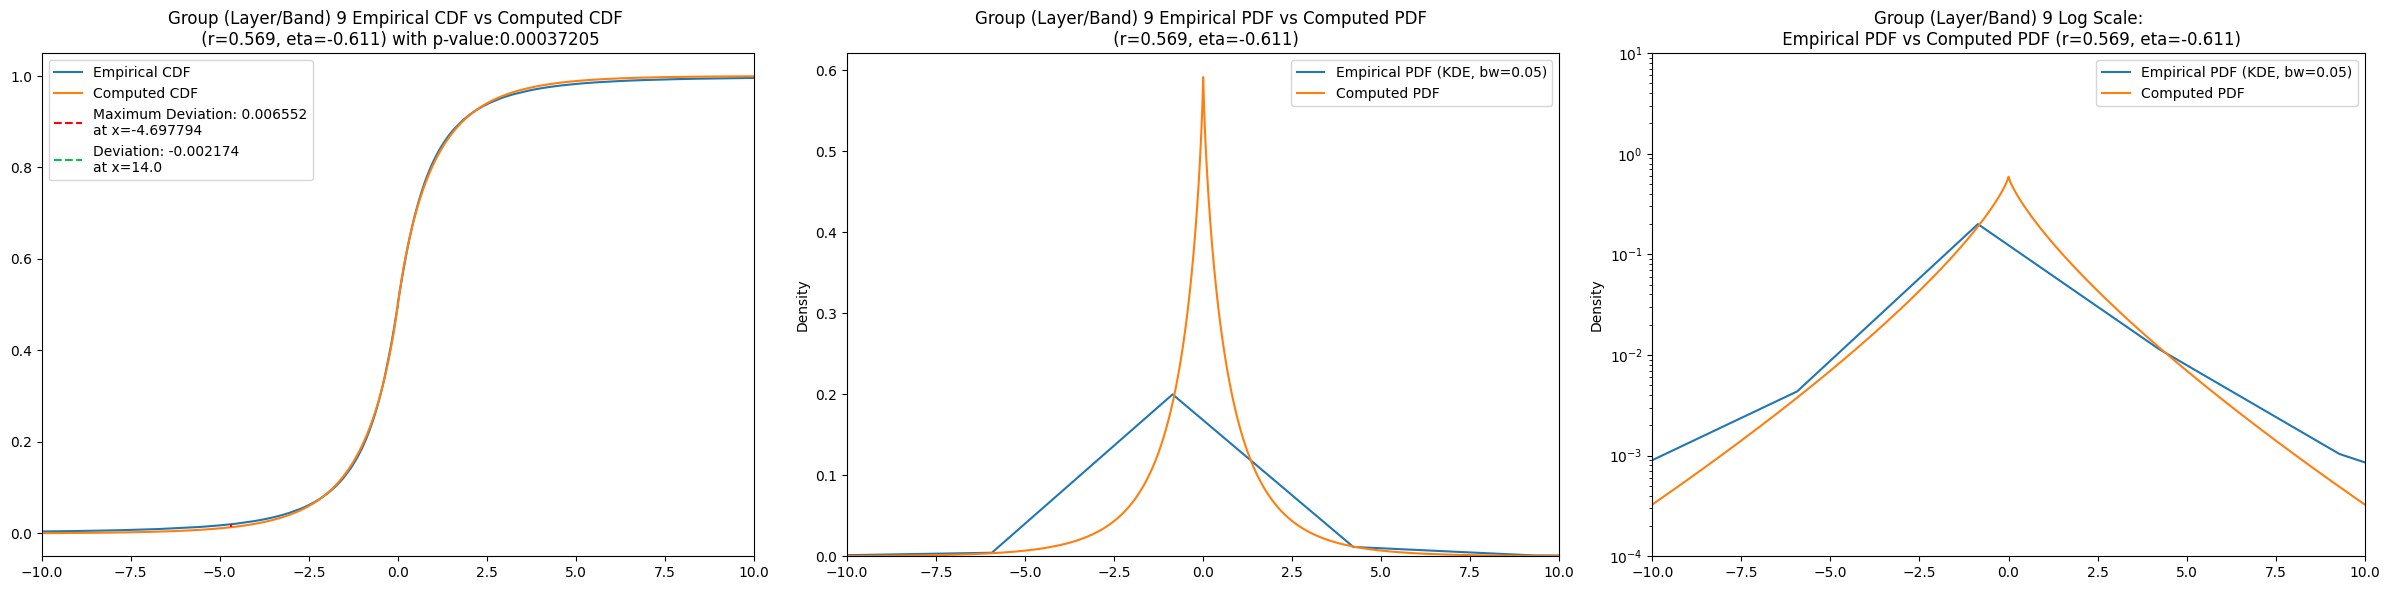

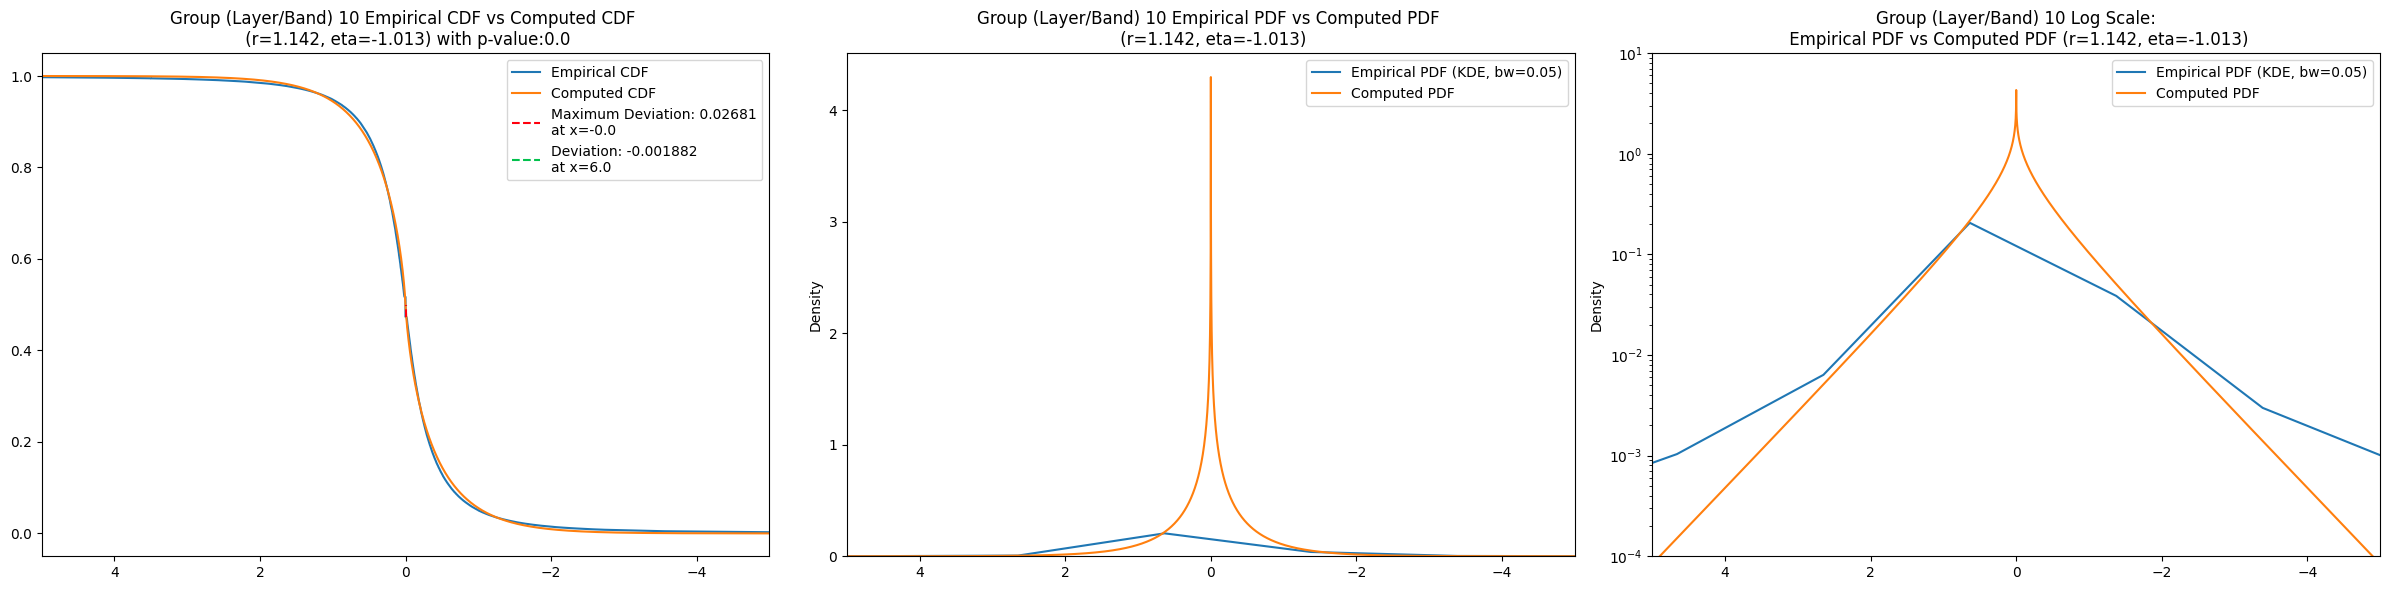

In [26]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group,
                    interval = (-(40 - group//3.1*15), (40 - group//3.1*15)),
                    provided_loc=(30 - group//3.1*8))
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)

## Comparing with Gaussian and Laplace

In [24]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [25]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

obs_var      var_lower      var_upper      obs_kurt  kurt_lower  \
layer                                                                          
2      179850.663319  104860.602584  313803.097773    501.382031   36.681158   
3       48278.004584   29689.330646   75753.017422    352.490549   90.264791   
4       13505.898405    6427.192129   29259.093413   1066.342755  112.379992   
5        3324.956135    1098.146111   15512.152578   6607.175158   86.604650   
6         902.737484     217.958739    6909.072731  18939.147805   76.743279   
7         249.888787      58.955746    1795.422641  19071.879951   51.215465   
8          57.432179      22.249527     277.407471   8527.045747   61.023674   
9          14.412282       5.902646      62.396598   6442.510618   77.116605   
10          2.162876       0.811485       9.683872   7078.996216   80.460814   

        kurt_upper  total_samples  initial_r  initial_eta  \
layer                                                       
2       756.942381         9000.0       0.21          0.3   
3       561.888369        36000.0       0.22         -0.1   
4      2700.459218       144000.0       0.24         -0.3   
5      7123.889070       576000.0       0.28         -0.3   
6      8727.643776      2304000.0       0.34         -0.2   
7      8606.341394      9216000.0       0.38         -0.3   
8      6916.660564     36864000.0       0.44         -0.4   
9      6425.334046    147456000.0       0.58         -0.6   
10     6695.153257    589824000.0       1.15         -1.0   

       kstest_stat_initial  ...  param_gaussian  kstest_stat_gaussian  \
layer                       ...                                         
2                 0.013056  ...      161.315000              0.054731   
3                 0.012202  ...       64.387600              0.057965   
4                 0.009140  ...       26.435600              0.054962   
5                 0.007905  ...       12.264400              0.048018   
6                 0.007537  ...        6.732320              0.041889   
7                 0.004525  ...        4.053460              0.040115   
8                 0.005698  ...        2.495400              0.042227   
9                 0.007569  ...        1.214770              0.042277   
10                0.026810  ...        0.426317              0.043705   

       kstest_pval_gaussian  param_laplace  kstest_stat_laplace  \
layer                                                             
2              7.138960e-24     142.176000             0.028658   
3             1.396570e-105      57.121400             0.031868   
4              0.000000e+00      23.537300             0.029317   
5              0.000000e+00      10.938100             0.022895   
6              0.000000e+00       5.972800             0.016282   
7              0.000000e+00       3.588460             0.013913   
8              0.000000e+00       2.200810             0.015294   
9              0.000000e+00       1.073640             0.015960   
10             0.000000e+00       0.337135             0.026810   

       kstest_pval_laplace     param_t  kstest_stat_t  kstest_pval_t  \
layer                                                                  
2             7.442110e-07  111.133000       0.028436   9.344680e-07   
3             3.385140e-32   45.020700       0.029345   2.298580e-27   
4            5.892970e-108   18.353100       0.026335   3.414980e-87   
5            1.012760e-262    8.580430       0.018531  3.032770e-172   
6             0.000000e+00    4.733350       0.013603   0.000000e+00   
7             0.000000e+00    2.852480       0.013148   0.000000e+00   
8             0.000000e+00    1.757550       0.015197   0.000000e+00   
9             0.000000e+00    0.855090       0.014041   0.000000e+00   
10            0.000000e+00    0.302689       0.026810   0.000000e+00   

       kstest_pval_gengamma  
layer                        
2              2.625100e-01  
3              5.813800e-04  
4    

In [ ]:
# def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
#     if metric_name == 'kstest_ratio':
#         metric = compute_ksratio
#     elif metric_name == 'kstest_stat':
#         metric = compute_ksstat_tail

#     for tail_cutoff in tail_cutoffs:
#         metrics = []
#         for layer in layers:
#             if distro == 'gengamma':
#                 cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
#             elif distro == 'gaussian':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
#             elif distro == 'laplace':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
#             elif distro == 't':
#                 cdf = scipy.stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
#             metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
#         master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for group in GROUPS:
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

# master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

# master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
# master_df

# Results

In [ ]:
import pandas as pd
import git
from pathlib import Path
import os
DATA_NAME = 'batch0approx1e5-agriVision-fourier-red'
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()

Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
CWD


master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)

In [ ]:
master_df#.filter(regex='total_samples|kstest_stat.*')
#master_df.filter(regex='total_samples|param.*')
# master_df.filter(regex='.*gaussian')
#master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


obs_var     var_lower     var_upper      obs_kurt  kurt_lower  \
band                                                                       
2     4.431448e+08  2.040596e+08  1.172902e+09   1951.210975   93.389987   
5     2.425320e+08  1.167651e+08  6.376783e+08   1732.740712  102.459843   
8     7.509878e+07  4.135542e+07  1.652329e+08    997.550338   76.816628   
11    6.680555e+07  1.909183e+07  4.286984e+08  13976.007954   62.877469   
14    1.964670e+07  9.259367e+06  7.427124e+07   4449.842883   48.653387   
17    9.104094e+06  4.527121e+06  3.404868e+07   4455.632700   42.402900   
20    4.104360e+06  2.023371e+06  1.352017e+07   3024.862169   61.902663   
23    1.838956e+06  6.761338e+05  1.053351e+07  11453.019888   71.847644   
26    1.165550e+06  2.007962e+05  1.103744e+07  27543.829429   79.598564   
29    3.894244e+05  2.562034e+04  3.816463e+06  38067.579156  100.885224   

       kurt_upper  total_samples  initial_r  initial_eta  kstest_stat_initial  \
band                                                                            
2     3809.453405        45000.0       0.16          1.1             0.011800   
5     3959.468650       117000.0       0.17          1.5             0.011201   
8     2699.581213       189000.0       0.17          1.1             0.006731   
11    8349.733185       495000.0       0.18          1.4             0.006411   
14    6157.999254      1134000.0       0.19          1.7             0.006926   
17    6093.362016      2574000.0       0.19          1.4             0.008478   
20    4879.518751      5967000.0       0.19          0.9             0.005827   
23    7815.204603     13887000.0       0.21          1.1             0.010091   
26    9199.390263     31968000.0       0.20          0.2             0.007970   
29    9678.418391     73701000.0       0.23          0.1             0.010788   

      ...  param_gaussian  kstest_stat_gaussian  kstest_pval_gaussian  \
band  ...                                                               
2     ...       6384.9600              0.044028          3.074840e-76   
5     ...       4468.0500              0.041173         8.895000e-173   
8     ...       3071.4600              0.037180         1.935400e-227   
11    ...       2326.5400              0.035271          0.000000e+00   
14    ...       1744.4800              0.034096          0.000000e+00   
17    ...       1243.7800              0.034877          0.000000e+00   
20    ...        768.4440              0.037194          0.000000e+00   
23    ...        418.3490              0.037800          0.000000e+00   
26    ...        202.3580              0.044217          0.000000e+00   
29    ...         64.0303              0.049811          0.000000e+00   

      param_laplace  kstest_stat_laplace  kstest_pval_laplace    param_t  \
band                                                                       
2          5694.050             0.018637         5.232690e-14  4473.4300   
5          3981.760             0.016246         2.978560e-27  3137.8700   
8          2724.410             0.012882         1.127140e-27  2168.5900   
11         2054.270             0.010895         1.823320e-51  1646.1000   
14         1540.840             0.009953         5.278280e-98  1238.7800   
17         1098.810             0.009883        8.733880e-219   883.3900   
20          677.348             0.011672         0.000000e+00   545.3750   
23          369.150             0.013563         0.000000e+00   295.9530   
26          179.352             0.018980         0.000000e+00   142.5520   
29           56.768             0.024686         0.000000e+00    45.1236   

      kstest_stat_t  kstest_pval_t  kstest_pval_gengamma  
band                                                      
2          0.015720   4.328990e-10          8.772600e-02  
5          0.011878   9.114010e-15          1.917900e-06  
8          0.009419   5.410980e-15          5.474200e-04  
11         0.007017   1.337840e-21      